# Introduction
The purpose of this exercise as a final project paper is to introduce you to the electrical excitability properties of mammalian brain neurons, including those of humans. We will use the Allen Cell Types Database of neuronal patch clamp recordings as a resource to explore mammalian neuronal excitability.

Our main goals for the final group paper are for you to more deeply understand the parameters of neuronal activity, introduce a practice of working with computer code for some of you, and for your group to demonstrate your expertise in writing a scientific paper. Next week we will give you more specific details of what we expect in your final group paper. For now we lay out the assignment directions for you to get started. 

Groups with 2 lab partners will pick 2 single neurons and those with 3 lab partners will pick 3 single neurons of different types, subtypes or human disease to characterize neuronal properties in Parts II, II and III. For part IV: 2 person groups will pick 2 different cell populations and groups of 3 lab partners will pick 3 different cell populations to compare. In part IV, pick, for example, human cells with epilepsy vs tumors; mouse neurons from different brain regions; aspiny vs spiny neurons; neurons of different types like glutamatergic neurons vs GABAergic neurons, cholinergic neurons vs GABAergic neurons, parvalbumin-, somatostatin- vs vasoactive intestinal peptide-containing neurons. You can look over the cell types [here](http://celltypes.brain-map.org/data) and suggest your own comparisons. Use populations with a reasonable number of cells.  Contact us and we'll help guide you in your choices. 

Present a screen shot in your paper of the morphologies of the neurons you pick.

# I. Warm Up Exercise: Getting familiar with Allen Cell Types Database page

## A. Pick a type of neuron

First, pick a neuron of interest using the filter options in [cell feature search](http://celltypes.brain-map.org/data). 

Click `Electrophysiology` at the lower right corner to open a new page with the summary of electrophysiology data for that neuron.

Refer to this page [(Searching the database)](http://help.brain-map.org/display/celltypes/Physiology+and+Morphology#) for introductions on how to use the interface in the Allen Cell Types Database.


## Excitability

## B. Reproduce a f-I curve with the electrophysiology page interface

In the electrophysiology summary page, select `Long Square` Square as the stimulus type. On the right side of the `select sweep`, click on one sweep with a particular stimulus amplitude. This shows the profile of a neuronal response to the current injection.

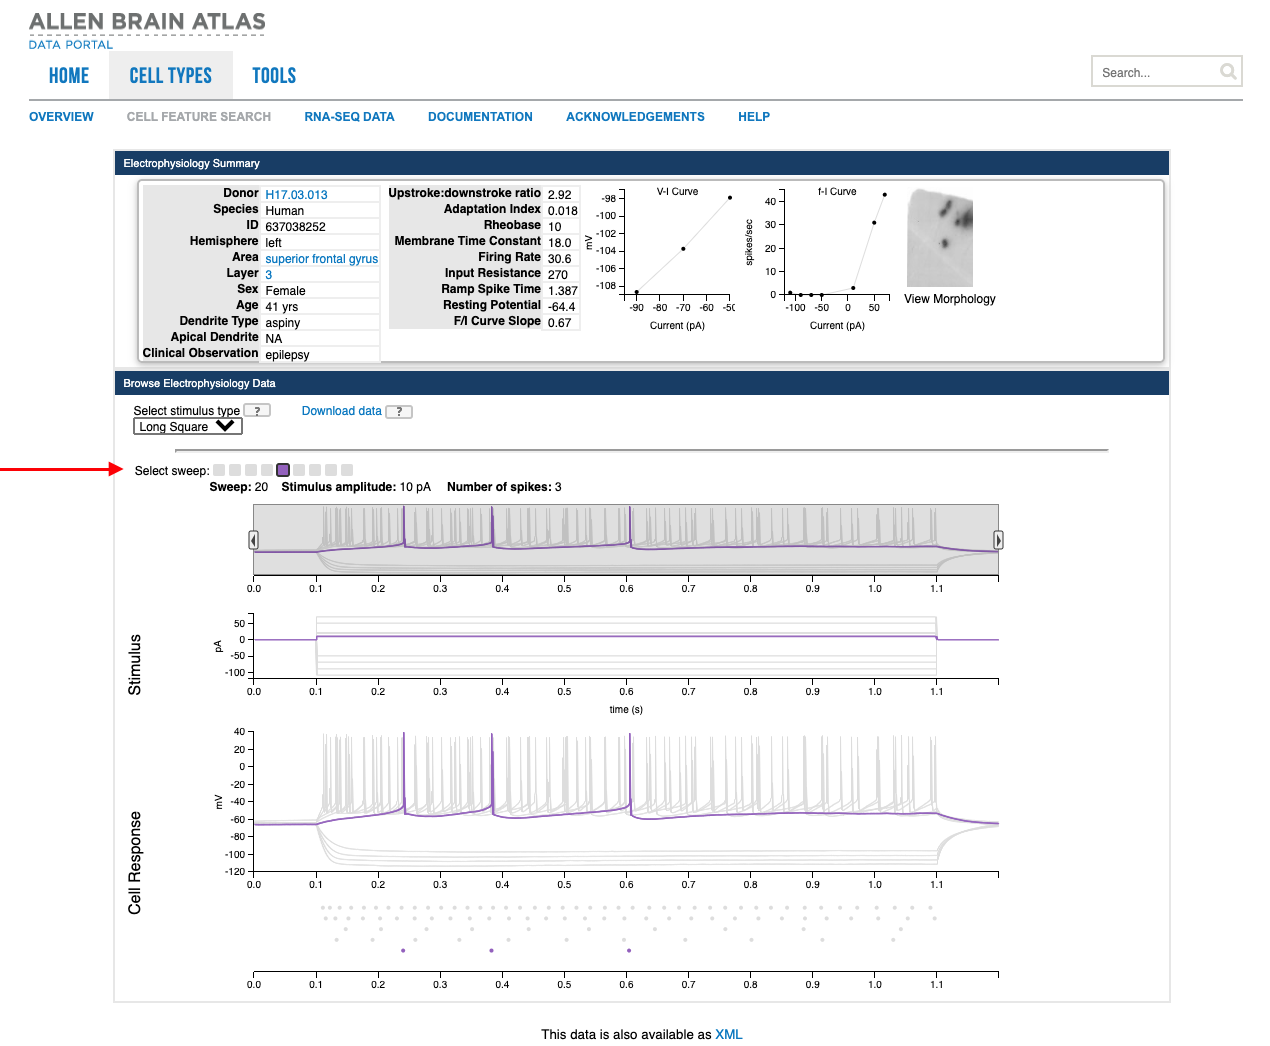
### 1. Find the Rheobase

Inject increasingly positive current into the neuron to find the minimum current that results in the firing of an action potential. This is the __rheobase__ of the cell.

### 2. Plot a f-I curve

From the electrophysiology summary page, keep increasing the amplitude of the depolarizing current injected above the rheobase and calculate the `average firing rate` for each step by dividing the `Number of Spikes` shown under the sweep to injection duration. Note if the neurons are firing phasically or tonically. Do they jump to fire with the current injection or are they slow to fire? At the end of a large current injection and active firing, does the membrane potential go back to rest, stay a little depolarized or undershoot?

Notes: If the graph does not show up the first time, try rerunning it again.

The image below shows the steps of running Jupyter Notebook. First, type in I and F values in the code cell, then click on the selected code cell (cell will be marked by green edging after clicking), and finally hit the “Run” button in a tool bar on the top (the top red box). After running, a number appears in the blank brackets next to the code cell and the results are displayed after the code cell. 

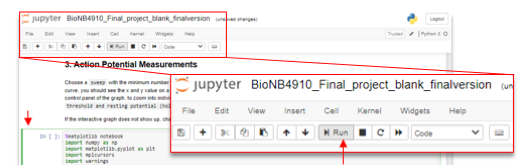

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np


#=======================================================
#== enter the fire rate and the injected current here ==
#=======================================================
I=[,,,,,,,,,,,,]  # enter the current injected here
F=[,,,,,,,,,,,,]  # enter the corresponding fire rate (# of spikes/second) 
#=======================================================

I.append(0)
F.append(0)

I=np.array(I)
F=np.array(F)

#sort the sweep from the lowest to highest current injected
inds = I.argsort()
Iinds=I[inds]
sorted_fir_rates = F[inds]

#take the average firing rate if there is more than one sweeps for the same current injection
uniquecurrent=np.unique(Iinds)
average_fir_rates=np.zeros(len(uniquecurrent))

for i in range(1,len(uniquecurrent)):
    average_fir_rates[i]=sorted_fir_rates[Iinds==uniquecurrent[i]].mean()


fig, ax = plt.subplots()
ax.plot(uniquecurrent,average_fir_rates,'o-')
ax.set_xlabel("Current (pA)")
ax.set_ylabel("Firing Frequency (Hz)")
plt.show()

Compare your results to the f/I curve shown on the upper right corner of the electrophysiology summary page.

# II. Medium Level Challenge: Measuring with a cursor

Now we are going to make measurements with the cursor, as we did with LabChart.

## A. Prerequisite 
1. To run this part of the code, you need to install Allen Software Development Kit (Allen SDK) first, as we developed the exercise based on Allen SDK. Type `pip install --user allenSDK` or `pip install allenSDK` in __Anaconda Prompt__ (for Windows users) or in __terminal__ (for Mac users) and hit `Enter` to run. If you have permission errors show up, right click the prompt or terminal and select `run as adminstrative`.
    
    If you see error message "ModuleNotFoundError: No module named 'allensdk" while running the following code cell, try the following steps:

    For Mac/Linux, try these 3 comments in series in terminal:
    
    `conda create -n allensdk python=3.7`
    
    `source activate allensdk` 
    
    `pip install allensdk`
    
    For Windows, try these 3 comments in series in Anaconda Prompt:
    
    `conda create -n allensdk python=3.7`
    
    `conda activate allensdk` 
    
    `pip install allensdk`
    


2. To get the cursor to work in Jupyter Notebook, you need to install [ipympl](https://anaconda.org/conda-forge/ipympl), install [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/user_install.html) and [mplcursor](https://mplcursors.readthedocs.io/en/stable/)
For Windows users, in the start manual, search "Anaconda Prompt" and run the following in anaconda prompt. For Mac users, open "terminal" and run the following. If you have permission errors show up, right click the prompt or terminal, select `run as administrative`.  

    to install ipympl:
    On Anaconda Prompt or terminal, enter `conda install -c conda-forge ipympl` and run.

    to install ipywidgets:
    On Anaconda Prompt or terminal, enter `conda install -c conda-forge ipywidgets` and run.  

    to install python cursor:
    On Anaconda Prompt or terminal, enter `pip install mplcursors` and run.
    
    If there is still error, check the link of each package above for more details.

Here is the explanation on how this code works from Allen SDK instructions: 

`CellTypesCache` is responsible for downloading Cell Types Database data to a standard directory structure on your hard drive.  If you use this class of cache, you will not have to keep track of where your data resides, other than a root directory.

The `data_set` variable is a `NwbDataSet` instance, which has some methods we can use to access the injected current stimulus waveform and the voltage response waveform for all experimental sweeps. 

In [ ]:
import allensdk
from allensdk.core.cell_types_cache import CellTypesCache

# Instantiate the CellTypesCache instance.  The manifest_file argument
# tells it where to store the manifest, which is a JSON file that tracks
# file paths.  If you supply a relative path (like this), it will go
# into your current working directory
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

#==============================================
#======== enter the cell id here ==============
#==============================================
cell_specimen_id =                                
#==============================================
# this saves the NWB file to 'cell_types/specimen_599434799/ephys.nwb' #599434799 is an example cell id

data_set = ctc.get_ephys_data(cell_specimen_id)

## B. Action Potential Measurements

Choose a `sweep` with the minimum number of action potentials from the electrophysiology summary page. Run the cell and click with your mouse on the curve, you should see the x and y value on a tag for that spot of the curve (yellow tag in the right figure below). Right click with the mouse to untag. Use the square button (as shown in the left figure below), the sixth one down the control panel of the graph, to zoom into individual action potentials and measure the `amplitude`, `half width`, `after hyperpolarization (trough)`, `threshold and resting potential (holding potential)`.

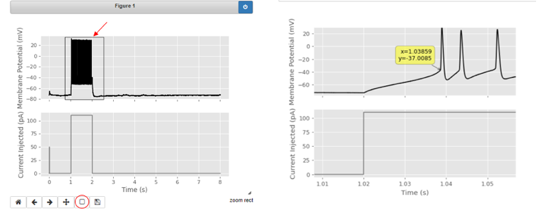

If the interactive graph does not show up, change the first line to `%matplotlib widget`.  

In [ ]:
%matplotlib notebook  
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
import warnings
warnings.filterwarnings('ignore')

#================================================================
#========= change the sweep number here =========================
#================================================================
sweep_number = 
#================================================================
#sweep number can be found below 'select sweep' next to 'sweep:'

sweep_data = data_set.get_sweep(sweep_number)

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1]+1] # in A
v = sweep_data["response"][0:index_range[1]+1] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, v, color='black')
axes[1].plot(t, i, color='gray')
axes[0].set_ylabel("Membrane Potential (mV)")
axes[1].set_ylabel("Current Injected (pA)")
axes[1].set_xlabel("Time (s)")

mplcursors.cursor()

plt.show()

## C. Hyperpolarization

Plot a voltage response curve from sweeps with negative current injected, and answer the following questions:
First, choose a current with a larger hyperpolarization (~ 30 mV) to answer questions 1 and 2.  Zoom into the response curve to answer 1 and 2.

1.	Is there a sag during hyperpolarization?

2.	Is there rebound firing after hyperpolarization?

Then, choose a current with a small hyperpolarization (5-10 mV)  to answer question 3.

3.	Measure the time constant (tau) of the voltage decay.  

Make sure you enter the sweep number.

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
import warnings
warnings.filterwarnings('ignore')

#================================================================
#========= change the sweep number here =========================
#================================================================
sweep_number = 
#================================================================
#sweep number can be found below 'select sweep' next to 'sweep:'

sweep_data = data_set.get_sweep(sweep_number)

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1]+1] # in A
v = sweep_data["response"][0:index_range[1]+1] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, v, color='black')
axes[1].plot(t, i, color='gray')
axes[0].set_ylabel("Membrane Potential (mV)")
axes[1].set_ylabel("Current Injected (pA)")
axes[1].set_xlabel("Time (s)")


mplcursors.cursor()

plt.show()

## D. Input resistance
### 1. Calculate Rinput with a V-I curve

Change the sweep number from the most negative current to a positive current below rheobase, and measure the membrane potential (V) in response to the different currents injected (I). 

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
import warnings
warnings.filterwarnings('ignore')

#================================================================
#========= change the sweep number here =========================
#================================================================
sweep_number = 
#================================================================
#sweep number can be found below 'select sweep' next to 'sweep:'

sweep_data = data_set.get_sweep(sweep_number)

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1]+1] # in A
v = sweep_data["response"][0:index_range[1]+1] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, v, color='black')
axes[1].plot(t, i, color='gray')
axes[0].set_ylabel("Membrane Potential (mV)")
axes[1].set_ylabel("Current Injected (pA)")
axes[1].set_xlabel("Time (s)")


mplcursors.cursor()

plt.show()

Enter the measured V and I here to plot the V-I curve. Remember to include a point with 0 current injection (V=resting potential when I=0).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


#================================================================
#== enter the membrane potential and the injected current here ==
#== remember to include a point with 0 current injection ========
#================================================================
I=np.array([ , , , ,])  # enter the current injected here
V=np.array([ , , , ,])  # enter the corresponding membrane potential
#================================================================

fig, ax = plt.subplots()
ax.plot(I,V,'o')
ax.set_xlabel("Current (pA)")
ax.set_ylabel("Membrane Potential (mV)")
plt.show()

Enter the measured V and I here again to plot a V-I curve and fit the curve with a straight line. What does this tell you about the input resistance? 

In [ ]:
# get the slope of V/I
import numpy as np
from scipy.optimize import curve_fit

#================================================================
#== enter the membrane potential and the injected current here ==
#================================================================
I=np.array([ , , , ,])  # enter the current injected here
V=np.array([ , , , ,])  # enter the corresponding membrane potential
#================================================================

# fit the data with a straight line
def fit_func(x, a, b):
    return a*x + b

params = curve_fit(fit_func, I, V)
[a, b] = params[0]

# print the fitting curve equation
s='y= %5.3f *x + %5.3f' %(a,b)
print(s)

# plot data with a fitting line
fig, ax = plt.subplots()
Ifit= np.linspace(I[0], I[-1], 50)
Vfit= fit_func(Ifit,a,b)
ax.plot(I,V,'o')
ax.plot(Ifit,Vfit,'-')
ax.set_xlabel("Current (pA)")
ax.set_ylabel("Membrane Potential (mV)")
plt.show()


### 2. Calculate Rinput with small hyperpolarizing current injected
Now choose a sweep number with a smallest hyperpolarizing current injection (5- 10 mV). Measure the change in membrane potential and calculate the input resistance of the neuron using Δ V/I.

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
import warnings
warnings.filterwarnings('ignore')

#=======================================================
#========= change the sweep number here ================
#=======================================================
sweep_number = 
#=======================================================
#sweep number can be found below 'select sweep' next to 'sweep:'

sweep_data = data_set.get_sweep(sweep_number)

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1]+1] # in A
v = sweep_data["response"][0:index_range[1]+1] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, v, color='black')
axes[1].plot(t, i, color='gray')
axes[0].set_ylabel("Membrane Potential (mV)")
axes[1].set_ylabel("Current Injected (pA)")
axes[1].set_xlabel("Time (s)")


mplcursors.cursor()

plt.show()

In [ ]:
#================================================================
#== enter the membrane potential and the injected current here ==
#================================================================
I=70  # enter the current injected here (pA)
deltaV=19  # enter the corresponding change in membrane potential (mV)
#================================================================

Rinput=deltaV*1000/I
print('Rinput= %f MOhms'%Rinput)

## E. Ramp injection
Pick a sweep with ramp injection.  Choose a sweep where the cell fires. Get the rheobase and AP threshold from the ramp injection measurement. Compare your results here with the results in 2-1 and in 3.

In addition, ramp current injection allows us to study the subthreshold responses. Does the voltage response increase linearly as the current increases? Why/why not?

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
import warnings
warnings.filterwarnings('ignore')

#=======================================================
#========= change the sweep number here ================
sweep_number = 
#=======================================================
#sweep number can be found below 'select sweep' next to 'sweep:'

sweep_data = data_set.get_sweep(sweep_number)

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1]+1] # in A
v = sweep_data["response"][0:index_range[1]+1] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, v, color='black')
axes[1].plot(t, i, color='gray')
axes[0].set_ylabel("Membrane Potential (mV)")
axes[1].set_ylabel("Current Injected (pA)")
axes[1].set_xlabel("Time (s)")


mplcursors.cursor()

plt.show()

# III. Measuring with code

Plot the instantaneous frequency over time using the highest current injection (pick a sweep with the highest `long square` current) to observe spike firing accommodation. If the APs start failing at a high level of current injection, pick a lower current injection to do this. This time, we extract the time points of a spike by using `EphysSweepFeatureExtractor` from allensdk.

If you have not run the second block of the file, either run it again or remove one "#" for each commented line from "start" to "end" and enter the cell id again.

In [ ]:
from allensdk.ephys.ephys_extractor import EphysSweepFeatureExtractor
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##======================================================================================================
## If you have not run the 2nd block of code under "II. Medium Level Challenge: Measure with a cursor",
## uncomment the line below by removing one "#" from "start" to "end"
##======================================================================================================

##=================start removing the "#================================================================
#from allensdk.core.cell_types_cache import CellTypesCache
#ctc = CellTypesCache(manifest_file='cell_types/manifest.json')
##==============================================
##======== enter the cell id here ==============
##==============================================
#cell_specimen_id =      #example: 599434799
##==============================================
#data_set = ctc.get_ephys_data(cell_specimen_id)
##=================end of removing the "#================================================================


#=======================================================
#========= change the sweep number here ================
sweep_number = 
#=======================================================
#sweep number can be found below 'select sweep' next to 'sweep:'

sweep_data = data_set.get_sweep(sweep_number)

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1]+1] # in A
v = sweep_data["response"][0:index_range[1]+1] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

sweep_ext = EphysSweepFeatureExtractor(t=t, v=v, i=i)
sweep_ext.process_spikes()


#time = (sweep_ext.spike_feature("peak_t")[1:]+sweep_ext.spike_feature("peak_t")[:-1])/2
time = sweep_ext.spike_feature("peak_t")[1:]
inst_fir_rate = 1.0/np.diff(sweep_ext.spike_feature("peak_t"))

fig, ax2 = plt.subplots()
ax2.plot(t,v,'-')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Memb. Potential (mV)")
ax2.set_xlim(min(time)-0.1,max(time)+0.1)

fig, ax = plt.subplots()
ax.plot(time,inst_fir_rate,'o-')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Inst. Firing Rate (Hz)")
ax.set_xlim(min(time)-0.1,max(time)+0.1)

plt.show()

## A. f-I curve with maximum frequency
In 2-2, we plotted the f-I curve using average firing frequency. Now, we will plot the f-I curve again with maximum and minimum instantaneous firing frequency for each current injection step. Compare these plots with the results from 2-2.

In [ ]:
from allensdk.ephys.ephys_extractor import EphysSweepFeatureExtractor
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##======================================================================================================
## If you have not run the 2nd block of code under "II. Medium Level Challenge: Measure with a cursor",
## uncomment the line below by removing one "#" from "start" to "end"
##======================================================================================================

##=================start removing the "#================================================================
#from allensdk.core.cell_types_cache import CellTypesCache
#ctc = CellTypesCache(manifest_file='cell_types/manifest.json')
##==============================================
##======== enter the cell id here ==============
##==============================================
#cell_specimen_id =      #example: 599434799
##==============================================
#data_set = ctc.get_ephys_data(cell_specimen_id)
##=================end of removing the "#================================================================

currents = []
max_inst_fir_rates = []
min_inst_fir_rates = []


data_set = ctc.get_ephys_data(cell_specimen_id)
sweepIDs = data_set.get_sweep_numbers()
sweepNum = len(sweepIDs)
for i in range(1,sweepNum):
    sweepMeta = data_set.get_sweep_metadata(sweepIDs[i])
    if sweepMeta['aibs_stimulus_name'] == 'Long Square':        
        #print(sweepIDs[i])
        try:
            sweep_data = data_set.get_sweep(sweepIDs[i])
        except:
            continue

        index_range = sweep_data["index_range"]
        i = sweep_data["stimulus"][0:index_range[1]+1] # in A
        v = sweep_data["response"][0:index_range[1]+1] # in V
        i *= 1e12 # to pA
        v *= 1e3 # to mV

        sampling_rate = sweep_data["sampling_rate"] # in Hz
        t = np.arange(0, len(v)) * (1.0 / sampling_rate)

        sweep_ext = EphysSweepFeatureExtractor(t=t, v=v, i=i, start=1.02, end=2.02)
        sweep_ext.process_spikes()

        if len(sweep_ext.spike_feature("peak_t")) < 2:
            continue

        current_injected = sweep_ext.spike_feature("peak_i")
        max_inst_fir_rate = np.max(1.0/np.diff(sweep_ext.spike_feature("peak_t")))
        min_inst_fir_rate = np.min(1.0/np.diff(sweep_ext.spike_feature("peak_t")))

        currents.append(np.max(current_injected))
        max_inst_fir_rates.append(max_inst_fir_rate)
        min_inst_fir_rates.append(min_inst_fir_rate)



#add a point (0,0), f=0 when there is 0 current injected
currents.append(0)
max_inst_fir_rates.append(0)
min_inst_fir_rates.append(0)        
            
            
Currents=np.array(currents)
Max_inst_fir=np.array(max_inst_fir_rates)
Min_inst_fir=np.array(min_inst_fir_rates)


#sort the sweep from the lowest to highest current injected
inds = Currents.argsort()
currentsinds=Currents[inds]
sorted_max_inst_fir_rates = Max_inst_fir[inds]
sorted_min_inst_fir_rates = Min_inst_fir[inds]

#take the average firing rate if there is more than one sweeps for the same current injection
uniquecurrentsinds=np.unique(currentsinds)
average_max_inst_fir_rates=np.zeros(len(uniquecurrentsinds))
average_min_inst_fir_rates=np.zeros(len(uniquecurrentsinds))
for i in range(1,len(uniquecurrentsinds)):
    average_max_inst_fir_rates[i]=sorted_max_inst_fir_rates[currentsinds==uniquecurrentsinds[i]].mean()
    average_min_inst_fir_rates[i]=sorted_min_inst_fir_rates[currentsinds==uniquecurrentsinds[i]].mean()
    
            
fig, ax = plt.subplots()
ax.plot(uniquecurrentsinds,average_max_inst_fir_rates,'o-',label='max firing rate')
ax.plot(uniquecurrentsinds,average_min_inst_fir_rates,'o-',label='min firing rate')
ax.set_xlabel("Current Injected (pA)")
ax.set_ylabel("Firing Rate (Hz)")
ax.legend()
plt.show()

## B. Instantaneous firing rate in ramp current injection
In this section, we will examine the electrophysiology features from ramp current injections. We will plot the instantaneous firing rate and the current injected over time. Find the current when the cell starts to fire. Compare this rheobase measured from the ramp current injection to the rheobase measured from the long square step current injection in 2-1.

If your cell does not fire any action potentials during ramp current injection, skip the plot and discuss why it might not fire any action potentials during this depolarization.

In [ ]:
from allensdk.ephys.ephys_extractor import EphysSweepFeatureExtractor
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##======================================================================================================
## If you have not run the 2nd block of code under "II. Medium Level Challenge: Measure with a cursor",
## uncomment the line below by removing one "#" from "start" to "end"
##======================================================================================================

##=================start removing the "#================================================================
#from allensdk.core.cell_types_cache import CellTypesCache
#ctc = CellTypesCache(manifest_file='cell_types/manifest.json')
##==============================================
##======== enter the cell id here ==============
##==============================================
#cell_specimen_id =      #example: 599434799
##==============================================
#data_set = ctc.get_ephys_data(cell_specimen_id)
##=================end of removing the "#================================================================


#=====================================================================
#========= change the sweep number here to ramp sweep ================
sweep_number = 
#=====================================================================
#sweep number can be found below 'select sweep' next to 'sweep:'

sweep_data = data_set.get_sweep(sweep_number)

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1]+1] # in A
v = sweep_data["response"][0:index_range[1]+1] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

sweep_ext = EphysSweepFeatureExtractor(t=t, v=v, i=i)
sweep_ext.process_spikes()


time = sweep_ext.spike_feature("peak_t")[1:]


inst_fir_rate = 1.0/np.diff(sweep_ext.spike_feature("peak_t"))


plt.style.use('ggplot')
fig, axes2 = plt.subplots()
axes2.plot(t,v,'-')
axes2.set_ylabel("Memb. Potential (mV)")
axes2.set_xlim(min(time)-1,max(time)+0.2)

fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(time, inst_fir_rate,'o')
axes[1].plot(sweep_ext.spike_feature("peak_t"),sweep_ext.spike_feature("peak_i"),'o-')
axes[0].set_ylabel("Inst. Firing Rate (Hz)")
axes[1].set_ylabel("Current Injected (pA)")
axes[1].set_xlabel("Time (s)")


plt.show()

## C. Action Potential Measurement with EphysSweepFeatureExtractor

We can also use the `EphysSweepFeatureExtractor` to calculate electrophysiology features for given spikes with the cell id and sweep id specified. Choose a sweep with a long square current. Compare the results with your measurement in section 3.

In [ ]:
from allensdk.ephys.ephys_extractor import EphysSweepFeatureExtractor
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##======================================================================================================
## If you have not run the 2nd block of code under "II. Medium Level Challenge: Measure with a cursor",
## uncomment the line below by removing one "#" from "start" to "end"
##======================================================================================================

##=================start removing the "#================================================================
#from allensdk.core.cell_types_cache import CellTypesCache
#ctc = CellTypesCache(manifest_file='cell_types/manifest.json')
##==============================================
##======== enter the cell id here ==============
##==============================================
#cell_specimen_id =      #example: 599434799
##==============================================
#data_set = ctc.get_ephys_data(cell_specimen_id)
##=================end of removing the "#================================================================


#=====================================================================
#========= change the sweep number here to ramp sweep ================
sweep_number = 
#=====================================================================
#sweep number can be found below 'select sweep' next to 'sweep:'

sweep_data = data_set.get_sweep(sweep_number)

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1]+1] # in A
v = sweep_data["response"][0:index_range[1]+1] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

sweep_ext = EphysSweepFeatureExtractor(t=t, v=v, i=i)
sweep_ext.process_spikes()

print("Avg spike threshold: %.01f mV" % sweep_ext.spike_feature("threshold_v").mean())
print("Avg spike width: %.02f ms" %  (1e3 * np.nanmean(sweep_ext.spike_feature("width"))))
print("Avg spike peak amplitude: %.01f mV" %  sweep_ext.spike_feature("peak_v").mean())
print("Avg spike trough: %.01f mV" %  sweep_ext.spike_feature("trough_v").mean())

Run the following block to see what features can be calculated for each spike using `EphysSweepFeatureExtractor`. You can then change the last 4 lines in the block above to get different features of interest. Features that cannot be calculated for given spikes will show `NaN`.

In [ ]:
sweep_ext.spike_feature_keys()

# IV. Compare two cell types 

In this exploration, instead of examining the features of individual neurons, compare two groups of neurons (three groups of neurons for groups with three partners or more) from different cell types or with different morphologies in the same cell type for your final report.  We will help guide you in your choices if you wish.  

This part of the code was adapted from code written by [Professor Ashley Juavinett in UCSD](https://github.com/ajuavinett/CellTypesLesson/blob/master/CellTypesNotebook.ipynb). 

This code tells you how many cells are in the database for a species.

In [ ]:
from allensdk.core.cell_types_cache import CellTypesCache
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

from allensdk.api.queries.cell_types_api import CellTypesApi
# download all cells
cells = ctc.get_cells()
print("Total cells: %d" % len(cells))
# mouse cells
cells = ctc.get_cells(species=[CellTypesApi.MOUSE])
print("Mouse cells: %d" % len(cells))
# human cells
cells = ctc.get_cells(species=[CellTypesApi.HUMAN])
print("Human cells: %d" % len(cells))

The code below prints out all available features.

In [ ]:
import pandas as pd

# download all electrophysiology features for all cells
ephys_features = ctc.get_ephys_features()
ef_df = pd.DataFrame(ephys_features)

print("Ephys features available for %d cells:" % len(ef_df))
print(ef_df.columns)

In [ ]:
# make a dataframe out of ephys features
ephys_features_df = pd.DataFrame.from_records(ephys_features)
ephys_features_df.head(1)

# grab mouse data and merge with dataframe
mouse_df = pd.DataFrame(ctc.get_cells(species=[CellTypesApi.MOUSE]))
mouse_ephys_df = pd.merge(mouse_df,ephys_features_df,left_on='id',right_on='specimen_id',how='left')

# grab human data and merge with dataframe
human_df = pd.DataFrame(ctc.get_cells(species=[CellTypesApi.HUMAN]))
human_ephys_df = pd.merge(human_df,ephys_features_df,left_on='id',right_on='specimen_id',how='left')

print('Dataframes created.')

Print out the features of first 5 mouse neurons in the data base to get a sense of the structure of the data.

In [ ]:
#print out the features of first 5 mouse neurons
mouse_df[1:5]

Print out the features of first 5 human neurons in the data base to get a sense of the structure of the data.

In [ ]:
#print out the features of first 5 human neurons
human_df[1:5]

## A. Histogram of Features

### Modify the three example codes below to compare the groups of cells you picked

You should modify the codes from examples 1 to 3 and use these codes to compare two groups of interest for your final report. You can modify the code to compare between human neurons by changing the first two lines from `mouse_ephys_df` to `human_ephys_df`. You can also specify groups based on their other properties such as cell types or disease types. See the second example for comparing features between two different cell types of mouse neurons by replacing `dendrite_type` to `transgenic_line`.

Once you specify two groups of cells to compare, go through different parameters listed below for comparison. To compare these features between two groups, change the parameter to the strings listed below. For example, change `parameter = 'vrest'` to `parameter = 'peak_v_long_square'` for comparing amplitude.

Here are features to focus on for your final paper:


__Amplitude__:`peak_v_long_square`

__Trough__:`trough_v_long_square`

__Input Resistance__:`input_resistance_mohm`

__Threshold__:`threshold_v_long_square`

__Resting Potential__:`vrest`

__Membrane time constant (ms)__:`tau`

__Averge Interspike Interval__:`avg_isi`

__Adaptation Ratio__:`adaptation`

__Width__: This is tricky. Check example 3 for how to do this measurement

To explore other available features (optional), check the output from the second block in this section (section IV).



### 1. Example 1: comparing the resting potential of aspiny and spiny neurons
Here is an example code to compare the resting potential between mouse aspiny neurons and spiny neurons.

In [ ]:
#======================================================================================
# ================change 'mouse_ephys_df' to 'human_ephys_df'==========================
#======================================================================================
aspiny = mouse_ephys_df[mouse_ephys_df['dendrite_type']== 'aspiny']
spiny = mouse_ephys_df[mouse_ephys_df['dendrite_type']== 'spiny']
#======================================================================================
print(['Number of mouse' + 'aspiny' + 'cells: %d' % len(aspiny)])
print(['Number of mouse' + 'spiny' + 'cells: %d' % len(spiny)])

#======================================================================================
# ================change the parameter below===========================================
#======================================================================================
parameter = 'vrest'
#======================================================================================


plt.figure()
plt.hist([aspiny[parameter],spiny[parameter]],color=[(0, .5,.5, 0.5),(0, 0, 1, 0.5)],density=1)
#======================================================================================
# ================change x,y labels below==============================================
#======================================================================================
plt.xlabel('Resting Membrane Potential (mV)')
plt.ylabel('Presentage of the total cell')
plt.legend(['aspiny','spiny'])
#======================================================================================

plt.show()

### 2. Example 2: comparing the input resistance of parvalbumin neurons and glutamatergic neurons
Here is an example code to compare features between different cell types with the cell types identified by a transgenic reporter. When the reporter status is positive, the cell recorded is identified by the transgenic reports. In this example, `Pvalb-IRES-Cre` are mouse lines that expressed Cre only in parvalbumin-expressing neurons (PV). With Cre-dependent fluorescent reports, we can tag parvalbumin-expressing neurons with a fluorescent protein. This allows the researcher to record from that specific cell type.

You can change `Pvalb-IRES-Cre` to other celltypes of interest.

`Slc17a6-IRES-Cre` targets glutamatergic neurons.

`Gad2-IRES-Cre` targets GABAergic neurons.

`Sst-IRES-Cre` targets somatostatin-expressing neurons (SST). 

`Vip-IRES-Cre` targets vasoactive intestinal peptide-containing neurons (VIP). 

SST, VIP and PV are three main subsets of GABAergic neurons in the cortex. Though there are exceptions, where parvalbumin-expressing neurons can be excitatory.

Change the parameter `input_resistance_mohm` to other features listed above.

In [ ]:
# make sure we only check the neurons with positive reporter (That is, the cell type is identified by the transgenic reporter.)
mouse_ephys_dfpost=mouse_ephys_df[mouse_ephys_df['reporter_status']=='positive']

#======================================================================================
#=================change the cell type here=============================================
#======================================================================================
pv = mouse_ephys_dfpost[mouse_ephys_df['transgenic_line']== 'Pvalb-IRES-Cre']#replace 'Pvalb-IRES-Cre'
glu = mouse_ephys_dfpost[mouse_ephys_df['transgenic_line']== 'Slc17a6-IRES-Cre']#replace 'Pvalb-IRES-Cre' 
#======================================================================================
print(['Number of' + ' pv' + ' cells: %d' % len(pv)])
print(['Number of' + ' glutamate' + ' cells: %d' % len(glu)])

#======================================================================================
# ================change the parameter below===========================================
#======================================================================================
parameter = 'input_resistance_mohm'
#======================================================================================

plt.figure()
plt.hist([pv[parameter],glu[parameter]],color=[(0, .5,.5, 0.5),(0, 0, 1, 0.5)],density=1)

#======================================================================================
# ================change x,y labels below==============================================
#======================================================================================
plt.xlabel('Input Resistance(MOhm)')
plt.ylabel('Normalized Cell Counts')
plt.legend(['Parvalbumin neurons','Glutamatergic neurons'])
#======================================================================================


plt.show()

### 3. Example 3: comparing the spike width of parvalbumin neurons and glutamatergic neurons
Comparing the width is trickier as the CellTypesApi does not support some features such as width, but we can get an estimated width by measuring the time between peak and fast trough of the spikes.

In [ ]:
# to get an estimate of spike width, we calculated the width by measuring the time between peak and fast trough
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
mouse_ephys_dfpost=mouse_ephys_df[mouse_ephys_df['reporter_status']=='positive']

#======================================================================================
#=================change the cell type here=============================================
#======================================================================================
pv = mouse_ephys_dfpost[mouse_ephys_df['transgenic_line']== 'Pvalb-IRES-Cre']#replace 'Pvalb-IRES-Cre'
glu = mouse_ephys_dfpost[mouse_ephys_df['transgenic_line']== 'Slc17a6-IRES-Cre']#replace 'Pvalb-IRES-Cre' 
#======================================================================================
print(['Number of' + ' pv' + ' cells: %d' % len(pv)])
print(['Number of' + ' glutamate' + ' cells: %d' % len(glu)])

# Change your parameter below.
parameter = 'fast_trough_t_long_square'
parameter2 = 'peak_t_long_square'

plt.figure()
plt.hist([pv[parameter]-pv[parameter2],glu[parameter]-glu[parameter2]],color=[(0, .5,.5, 0.5),(0, 0, 1, 0.5)],density=1)
plt.xlabel('Width (peak to peak) (s)')
plt.ylabel('Normalized Cell Counts')
plt.legend(['Parvalbumin Neurons','Glutamatergic Neurons'])


plt.show()

# Want to explore more?

For people who would like to explore more excitability features, check [Allen SDK](http://alleninstitute.github.io/AllenSDK/cell_types.html) and the links in the acknowledgements.


# Acknowledgements

Part I to Part III was developed on the base of code from [Allen Institute for Brain Science](http://alleninstitute.github.io/AllenSDK/_static/examples/nb/cell_types.html#Cell-Types-Database). Part IV was adapted from code written by  [Professor Ashley Juavinett in UCSD](https://github.com/ajuavinett/CellTypesLesson/blob/master/CellTypesNotebook.ipynb). 

Undergraduate TA Gwenda Law contributed a great amount of the code in a very short time frame and trouble shooted the code to make sure it run smoothly. Undergraduate TA Molly Smullen and Gwenda Law wrote the instructions for Anaconda installation.

